In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
# Gantilah path ini dengan file CSV kamu
df = pd.read_csv("Ecommerce_Customers.csv")

# Tampilkan nama kolom (untuk memastikan)
print("Kolom:", df.columns.tolist())

# Konversi hanya kolom numerik (dari 'Avg. Session Length' ke 'Yearly Amount Spent')
# Pastikan index kolom sesuai
numeric_columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

# Ganti koma menjadi titik dan ubah ke float
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

# Cek hasil
print(df[numeric_columns].dtypes)
# Cek struktur data
print(df.info())
print(df.describe())



Kolom: ['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None
       Avg. 

In [24]:
print(df.head())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

In [15]:
# Menghapus kolom yang tidak relevan
df_cleaned = df.drop(columns=['Email', 'Address', 'Avatar'])

# Menangani outlier menggunakan metode IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Menghapus data yang berada di luar rentang IQR
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Menampilkan data setelah preprocessing
print("Data setelah preprocessing:")
print(df_scaled.describe())

Data setelah preprocessing:
       Avg. Session Length   Time on App  Time on Website  \
count         4.760000e+02  4.760000e+02     4.760000e+02   
mean          1.425564e-15 -2.041318e-15    -1.492737e-17   
std           1.001052e+00  1.001052e+00     1.001052e+00   
min          -2.802456e+00 -2.715752e+00    -2.608136e+00   
25%          -7.380474e-01 -7.047488e-01    -7.090547e-01   
50%           4.094980e-02 -7.845791e-02     5.383811e-03   
75%           7.013748e-01  7.298149e-01     6.498862e-01   
max           2.746391e+00  2.771329e+00     2.617196e+00   

       Length of Membership  Yearly Amount Spent  
count          4.760000e+02         4.760000e+02  
mean           5.429830e-16         2.033854e-16  
std            1.001052e+00         1.001052e+00  
min           -2.680198e+00        -2.591024e+00  
25%           -6.466259e-01        -7.491028e-01  
50%           -1.282677e-02         8.397454e-03  
75%            6.360597e-01         6.859837e-01  
max           

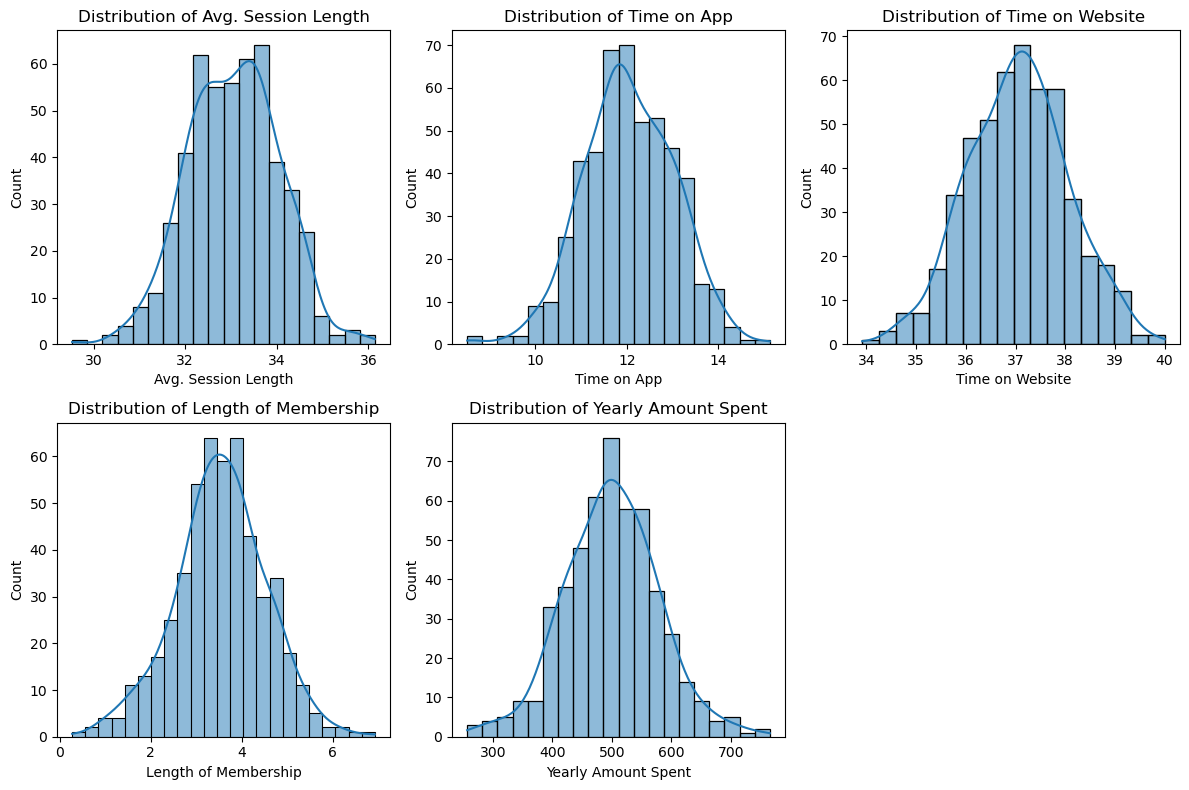

In [16]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Matriks Korelasi:
                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.038177        -0.004834   
Time on App                     -0.038177     1.000000         0.065210   
Time on Website                 -0.004834     0.065210         1.000000   
Length of Membership             0.013809    -0.054382        -0.046572   
Yearly Amount Spent              0.339804     0.475560         0.000581   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.013809             0.339804  
Time on App                      -0.054382             0.475560  
Time on Website                  -0.046572             0.000581  
Length of Membership              1.000000             0.767651  
Yearly Amount Spent               0.767651             1.000000  


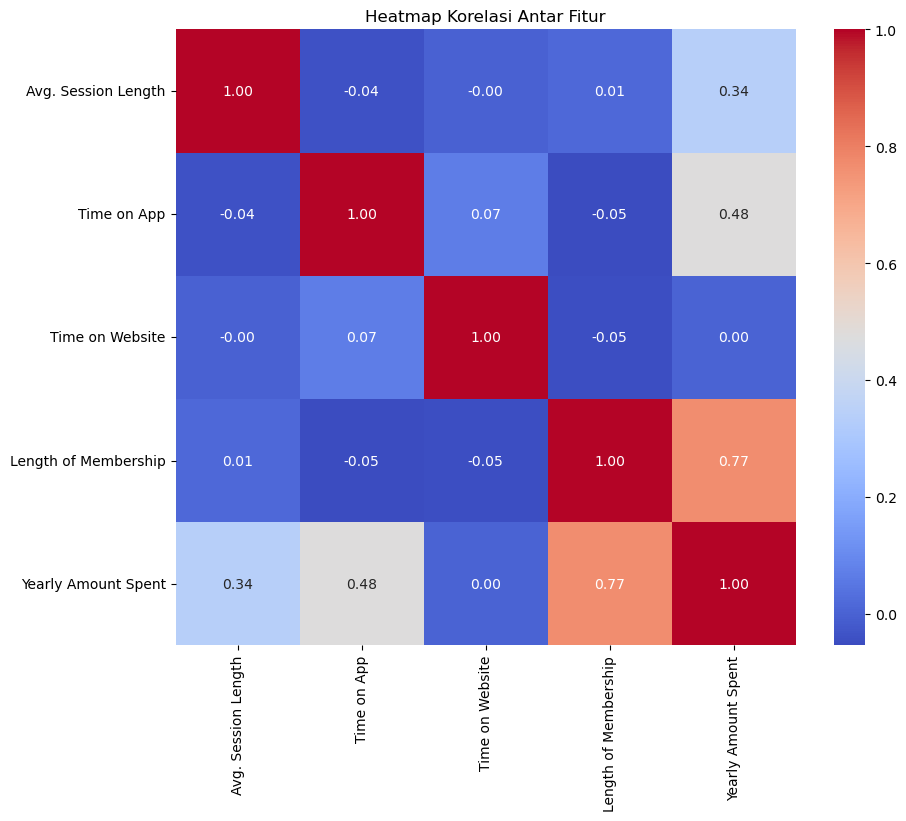

In [18]:
# Menghitung matriks korelasi
correlation_matrix = df_cleaned.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

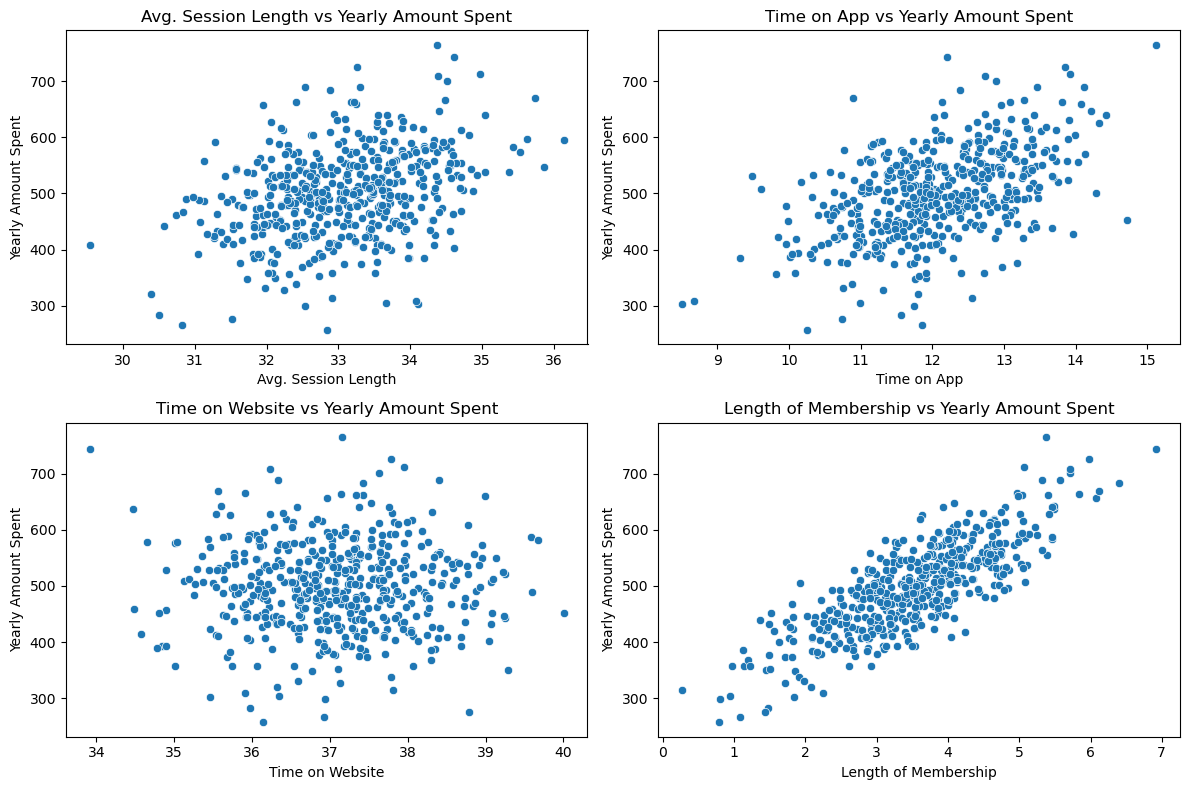

In [19]:
target = 'Yearly Amount Spent'
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()


In [21]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Koefisien model
coeff_df = pd.DataFrame(lr_model.coef_, index=features, columns=["Coefficient"])
print(coeff_df)


R² Score: 0.9806693454258992
MSE: 105.64514296279509
                      Coefficient
Avg. Session Length     25.690832
Time on App             38.688156
Time on Website          0.452799
Length of Membership    61.710503


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

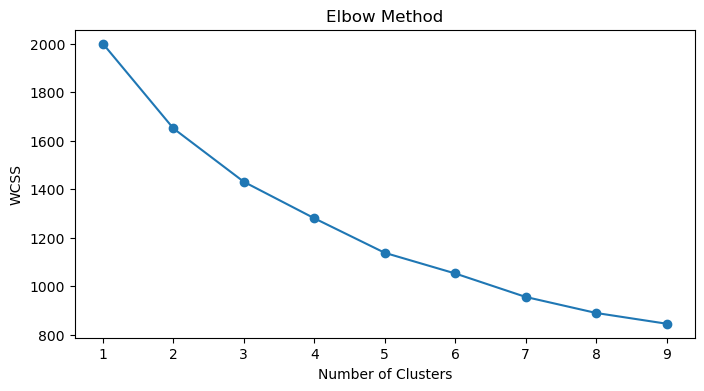

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


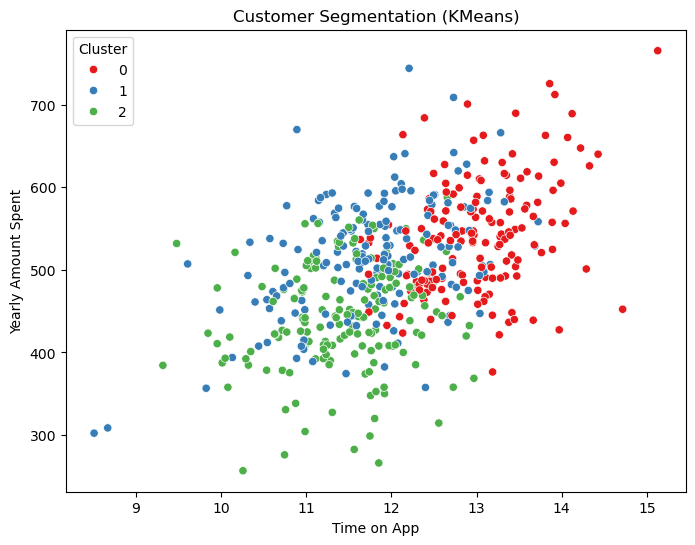

In [22]:
# Standarisasi data numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Gunakan Elbow Method untuk memilih jumlah klaster optimal
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Buat klaster (misalnya k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil klaster berdasarkan dua fitur utama
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Time on App'], y=df['Yearly Amount Spent'], hue=df['Cluster'], palette='Set1')
plt.title("Customer Segmentation (KMeans)")
plt.show()
